# Probabilistic Modelling and Reasoning

[Course homepage](https://www.inf.ed.ac.uk/teaching/courses/pmr/18-19/)

## Graphical Models

### Directed graphical model

$$p(x_1, \ldots, x_d) = \prod_{i=1}^d p(x_i | \mathrm{pa}_i )$$

#### Canonical connections

| Name | Connection | $z$ node | $p(x,y)$ | $p(x,y\mid z)$ |
|---|---|---|---|---|
| Serial<br>(chain, head-tail, tail-head) | ![](graphs/DAG_serial.svg) | default: open <br> instantiated: closed | $x \not\mspace{-2mu}\mathrel{\perp\mspace{-7mu}\perp} y$ | $x \mathrel{\perp\mspace{-7mu}\perp} y \mid z$ |
| Diverging<br>(fork, tail-tail) | ![](graphs/DAG_diverging.svg) | default: open <br> instantiated: closed | $x \not\mspace{-2mu}\mathrel{\perp\mspace{-7mu}\perp} y$ | $x \mathrel{\perp\mspace{-7mu}\perp} y \mid z$ |
| Converging<br>(collider, head-head, v-structure) | ![](graphs/DAG_converging.svg) | default: closed <br> with evidence: open | $x \mathrel{\perp\mspace{-7mu}\perp} y$ | $x \not\mspace{-2mu}\mathrel{\perp\mspace{-7mu}\perp} y \mid z$ |

#### D-separation

| Graphs | D-separated? | Independencies |
|---|---|---|
| ![](graphs/DAG_dsep_block1.svg) ![](graphs/DAG_dsep_block2.svg) | YES | $x \mathrel{\perp\mspace{-7mu}\perp} y \mid z$ |
| ![](graphs/DAG_serial.svg) ![](graphs/DAG_diverging.svg) | NO | $x \mathrel{\perp\mspace{-7mu}\perp} y$ not generally holds |
| ![](graphs/DAG_dsep_block3.svg) | YES | $x \mathrel{\perp\mspace{-7mu}\perp} y$
| ![](graphs/DAG_dsep_notblock3.svg) | NO | $x \mathrel{\perp\mspace{-7mu}\perp} y \mid z$ not generally holds|

#### Independencies

- Ordered Markov property (for a topological ordering): $\displaystyle x_i \mathrel{\perp\mspace{-7mu}\perp} (\mathrm{pre}_i \backslash \mathrm{pa}_i) \mid \mathrm{pa}_i, \forall i$
- Local Markov property (for any topological ordering): $\displaystyle x_i \mathrel{\perp\mspace{-7mu}\perp} (\mathrm{nondesc}(x_i) \backslash \mathrm{pa}_i) \mid \mathrm{pa}_i$
- Global Markov property: All independencies by d-separation
- Markov blanket: $\displaystyle x_i \mathrel{\perp\mspace{-7mu}\perp} \{ \text{all variables } \backslash x \backslash \mathrm{MB}(x) \} \mid \mathrm{MB}(x)$
- $\mathrm{MB}(x) = \{ \text{parents, childrent, co-parents} \}$

### Undirected graphical model

$$p(x_1, \ldots, x_d) = \frac{1}{Z} \prod_c \phi_c(\mathcal X_c) \quad \text{(Gibbs distribution)}$$

- $\mathcal X_c$ correspond to maximal cliques (a set of fully connected nodes that is not contained in another clique)

#### Graph separation

Conditioning on variables removes the corresponding nodes and connecting edges from the undirected graph. 

#### Independencies

- Local Markov property: $\displaystyle \alpha \mathrel{\perp\mspace{-7mu}\perp} | \{ X \backslash \alpha \backslash \mathrm{ne}(\alpha) \} \mid \mathrm{ne}(\alpha)$
- Pairwise Markov property: $\displaystyle \alpha \mathrel{\perp\mspace{-7mu}\perp} \beta \mid X \backslash \{ \alpha, \beta \}$ for all non-neighbouring $\alpha$ and $\beta$
- Global Markov property: all independencies from graph separation
- $\mathrm{MB}(x) = \mathrm{ne}(x)$

### Experessive power

#### Minimal I-map

- All independecies asserted by the graph must hold for $p$
- Removing an edge results in a graph making wrong independency assertions

##### Undirected

| Example | $p(x_1, x_2, x_3, x_4) \propto \phi_1(x_1, x_2) \phi_2(x_2,x_3) \phi_3(x_4)$ |
| --- | --- |
| Minimal I-map | ![](graphs/MinImap_undir.svg) |
| Not an I-map | ![](graphs/NotImap_undir.svg) |
| Not-minimal I-map | ![](graphs/NotMinImap_undir.svg) |

Construction:
1. Based on pairwise and local Markov property
1. Determine MB for each node and connect to all nodes in the MB

##### Directed

Construction:
1. Based on ordered Markov property
1. Determine parent set for each node and connect to all parents


- Not unique
- May not make same independece assertions

#### I-equivalence

- Same skeleton
- Same immoralities (colliders without covering edge)

#### Conversion

##### Directed to undirected

$$p(x_1, \ldots, x_d) = \prod_{i=1}^d p(x_i | \mathrm{pa}_i) \quad \Rightarrow \quad p(x_1, \ldots, x_d) = \prod_{i=1}^d \phi_i(x_i, \mathrm{pa}_i)$$

- Moralisation
- Form cliques for $(x_i, \mathrm{pa}_i)$

##### Undirected to directed

- Based on local Markov property
- Not have any immoralities
- Chordal/triangulated graphs

### Factor graphs

#### Advantages

- More informative
    - Better representing the factorisation
    - One-to-one mapping from Gibbs distribution
    - Example: 

\begin{align*}
p_A(x_1, x_2, x_3) &\propto \phi_1(x_1, x_2) \phi_2(x_2, x_3) \phi_3(x_3, x_1) \\
p_B(x_1, x_2, x_3) &\propto \phi(x_1, x_2, x_3)
\end{align*}

| UG for $p_A$ and $p_B$ | FG for $p_A$ | FG for $p_B$ |
| --- | --- | --- |
| ![](graphs/FG_UG.svg) | ![](graphs/FG_pA.svg) | ![](graphs/FG_pB.svg) |

- Without imposing ordering

    - Example: $p(x_1, x_2, x_3) = p(x_1, x_2) p(x_3 | x_1, x_2)$

| DAG1 | DAG2 | UG | FG |
| --- | --- | --- | --- |
| ![](graphs/FG_mix_DG1.svg) | ![](graphs/FG_mix_DG2.svg) | ![](graphs/FG_mix_UG.svg) | ![](graphs/FG_mix_FG.svg) |
| Force ordering $(x_1, x_2, x_3)$ | Force ordering $(x_2, x_1, x_3)$ | Condition on $x_1$, $x_2$ not shown | |

- Computational advantages
    - Less free parameters with factorisations
- Statistical advantages
    - Represent independencies that DAGs or UGs cannot or do not represent

#### Marginal inferences

##### Variable elimination

- Distributive law $ab+ac = a(b+c)$
- Caching/recycling computations
- For general factor graphs

**Full factorisation**

Example: $p(x_1, x_2, x_3) \propto \phi_1(x_1) \phi_2(x_2) \phi_3(x_3)$

| &nbsp; | <img width=200/> $p(x_1=k)$ | Computational cost |
| --- | --- | --- |
| **Before** | $\displaystyle \sum_{x_2, x_3} p(x_1=k, x_2, x_3)$ | $K^3$ (sum over $K^2$ for each $k$) |
| **After** | $\displaystyle \phi_1(k) \left[ \sum_{x_2} \phi_2(x_2) \right] \left[ \sum_{x_3} \phi_3(x_3) \right]$ | $2K + K$ (recycling) |

**Chain**

Example: $\displaystyle p(x_1, \ldots, x_d) \propto \left[\prod_{i=1}^{d-1} \phi_i (x_i, x_{i+1}) \right] \phi_d(x_d)$

| &nbsp; | <img width=250/>Factorisation | Graph | Computational cost |
| --- | --- | --- | --- |
| **Before** | $\displaystyle \sum_{x_2, \ldots, x_d} p(x_1=k, \ldots, x_d)$ | ![](graphs/EI_chain_before.svg) | $K^d$ |
| **Eliminate $x_d$** | $\displaystyle \tilde\phi_d(x_{d-1}) = \sum_{x_d} \phi_{d-1}(x_{d-1}, x_d) \phi_d(x_d)$ | ![](graphs/EI_chain_1.svg) | $K^2$ |
| **Eliminate $x_{d-1}$** | $\displaystyle \tilde\phi_{d,d-1}(x_{d-2}) = \sum_{x_{d-1}} \phi_{d-2}(x_{d-2}, x_{d-1}) \tilde\phi_d(x_{d-1})$ | ![](graphs/EI_chain_2.svg) | $K^2$ |
| ... | ... | ... | ... |
| **Total** | &nbsp; | &nbsp; | $O((d-1)K^2)$ |

**Bucket**

Example: $\displaystyle p(X^k) \propto \prod_{i=1}^{m^k} \phi_i^k (\mathcal X_i^k)$

1. Choose $x^* \notin \mathcal X_{\text{target}}$ in a greedy way (with the least number of neighbours)
1. $\displaystyle p(X^{k+1}) \propto \prod_{i:x^x\notin\mathcal X_i^k} \phi_i^k (\mathcal X_i^k) \sum_{x^*} \prod_{i:x^*\in\mathcal X_i^k} \phi_i^k (\mathcal X_i^k) \propto \left[ \prod_{i:x^*\notin\mathcal X_i^k} \phi_i^k (\mathcal X_i^k) \right] \tilde\phi_* (\tilde{\mathcal X}_*)$, where $\displaystyle \tilde{\mathcal X}_* = \bigcup_{i:x^*\in\mathcal X_i^k} \left( \mathcal X_i^k \backslash x^* \right)$

##### Sum-product algorithm

- Variable elimination for factor trees (no loop) with messages
- Other names: message passing, beleif propagation
- Advantages: allow to compute all univariate marginals and all joint distributions

| <img width=300/>Message | Direction | Graph |
| --- | --- | --- |
| $\displaystyle \mu_{\phi \to x}(x) = \sum_{x_1, \ldots, x_j} \phi(x_1, \ldots, x_j, x) \prod_{i=1}^j \mu_{x_i \to \phi} (x_i)$ | Factor to variable | ![](graphs/EI_sumprod_f2v.svg) |
| $\displaystyle \mu_{x\to\phi}(x) = \prod_{i=1}^j \mu_{\phi_i \to x} (x)$ | Variable to factor | ![](graphs/EI_sumprod_v2f.svg) |
| $\displaystyle p(x) \propto \prod_{i=1}^j \mu_{\phi_i \to x} (x)$ | Unnormalised univariate marginal | ![](graphs/EI_sumprod_uni.svg) |
| $\displaystyle p(x_1, \ldots, x_j) \propto \phi(x_1, \ldots, x_j) \prod_{i=1}^j \mu_{x_i\to\phi}(x_i)$ | Unnormalised joint marginal | ![](graphs/EI_sumprod_joint.svg) |

#### Most probable states

- Distributive law $\max(ab, ac) = a \max(b,c)$
- Max-product algorithm (same as sum-product algorithm with $\max$ instead of $\sum$)
- Back-tracking for computing $\arg\max$

## Markov Models

### Markov chains

- $L$-th order Markov chain

$$p(x_1, \ldots, x_d) = \prod_{i=1}^d p(x_i | x_{i-L}, \ldots, x_{i-1})$$

- 1st order Markov chain

$$p(x_1, \ldots, x_d) = \prod_{i=1}^d p(x_i | x_{i-1})$$

- Transition distribution

$$p(x_i|x_{i-1}) \begin{cases}
\text{depends on } i & \text{homogeneous MC}\\
\text{does not depend on } i & \text{inhomogeneous MC}
\end{cases}$$

### Hidden Markov model

$$p(h_{1:d}, v_{1:d}) = p(v_1|h_1) p(h_1) \prod_{i=2}^d p(v_i|h_i) p(h_i|h_{i-1})$$

![](graphs/HMM_DAG.svg)

![](graphs/HMM_FG.svg)

- 1st order MC on hidden (latent) variables $h_i$
- Each visible (observed) variable $v_i$ depends only on correspoding hidden variable $h_i$
- Visibles are d-connected if hiddens are not observed, are d-separated if hiddens are given ($\displaystyle v_s \mathrel{\perp\mspace{-7mu}\perp} v_{1:s-1} \mid h_s$)
- $h_i$ explain all dependencies between $v_i$
- $\displaystyle h_s \mathrel{\perp\mspace{-7mu}\perp} v_{1:s-1} \mid h_{s-1}$
    
| Emission distribution<br>$p(v_i\vert h_i)$ | $h_i$ discrete | $h_i$ continuous |
| --- | --- | --- |
| **$v_i$ discrete** | matrix | pmf |
| **$v_i$ continuous** | pdf | pdf |
    
- If transition and emission distribution do not depent on $i$, stationary (homogemeous) HMM
- Gaussian mixture model: HMM with cluster $h_i \mathrel{\perp\mspace{-7mu}\perp} h_{i-1}$

### Inference

| Inference | Meaning | <img width=120/>Probability |
| --- | --- | --- |
| Filtering | Given previous $v_{1:t-1}$ and current observations $v_t$<br>Infer current hidden state $h_t$ | $p(h_t \vert v_{1:t})$ |
| Smoothing | Given previous $v_{1:t-1}$ and future observations $v_{t:u}$<br>Infer hidden state $h_t$ | $p(h_t \vert v_{1:u})$, ($t>u$) |
| Prediction | Given previous observations $v_{1:u}$<br>Infer future hidden state $h_t$ | $p(h_t \vert v_{1:u})$, ($t<u$) |
| Most likely hidden path<br>(Viterbi alignment) | Given previous $v_{1:t-1}$ and current observations $v_t$<br>Find the most likely hidden path $h_{1:t}$ | $\underset{h_{1:t}}{\arg\min} p(h_{1:t}\vert v_{1:t})$ |

#### Filtering

By message passing: $\displaystyle p(h_t | v_{1:t}) \propto \mu_{\phi_t \to h_t}(h_t) \mu_{f_t \to h_t}(h_t)$

By alpha-recursion: $\displaystyle p(h_t | v_{1:t}) \propto \mu_{h_t \to \phi_{t+1}}(h_t) = \alpha(h_t)$
- $\displaystyle \alpha(h_1) = p(h_1) \cdot p(v_1|h_1) = p(h_1, v_1) \propto p(h_1 | v_1)$
- $\displaystyle \alpha(h_s) = p(v_s | h_s) \sum_{h_{s-1}} p(h_s|h_{s-1}) \alpha(h_{s-1}) \overset{\text{induction}}{=} p(h_s, v_{1:s}) \propto p(h_s | v_{1:s}) \propto \underbrace{p(v_s|h_s)}_{\text{correction}} \underbrace{p(h_s|v_{1:s-1})}_{\text{prediction}}$

#### Smoothing

By message passing: $\displaystyle p(h_t|v_{1:u}) \propto \mu_{\phi_t \to h_t}(h_t) \mu_{f_t \to h_t}(h_t) \mu_{\phi_{t+1} \to h_t}(h_t) = \alpha(h_t) \mu_{\phi_{t+1} \to h_t}(h_t)$

By alpha-beta-recursion: $\displaystyle p(h_t|v_{1:u}) \propto \alpha_{h_t} \beta(h_t)$
- $\displaystyle \beta(h_s) = \sum_{h_{s+1}} p(h_{s+1}|h_s) p(v_{s+1}|h_{s+1}) \beta(h_{s+1})$
- $\displaystyle \beta(h_u) = 1$

## Model-based Learning

### Models

- Probabilistic model: probability distribution (pmf/pdf)
- Statistical model: set of probabilistic models
- Bayesian model

### Learning

#### Maximum likelihood estimation

$$\hat{\boldsymbol\theta} = \arg\max_{\boldsymbol\theta} \ell(\boldsymbol\theta) = \arg\max_{\boldsymbol\theta} L(\boldsymbol\theta)$$

- $\displaystyle \nabla_{\boldsymbol\theta} \ell(\boldsymbol\theta) |_{\hat{\boldsymbol\theta}} = 0$ and $\displaystyle \left. \frac{\mathrm{d}^2 l(\boldsymbol\theta)}{\mathrm{d} \boldsymbol\theta^2} \right|_{\hat{\boldsymbol\theta}} < 0$
- Moment matching

$$\underbrace{\mathbb E_{p(\mathbf x; \hat{\boldsymbol\theta})} \left[ \mathbf m(\mathbf x; \hat{\boldsymbol\theta}) \right] = \int \mathbf m(\mathbf x; \hat{\boldsymbol\theta}) p(\mathbf x; \hat{\boldsymbol\theta}) \mathrm d \mathbf x}_{\text{expected moment}} = \underbrace{\frac{1}{n} \sum_{i=1}^n \mathbf m(\mathbf x_i; \hat{\boldsymbol\theta})}_{\text{empirical moment}}$$

where $\displaystyle p(\mathbf x; \boldsymbol\theta) = \frac{\tilde p(\mathbf x; \boldsymbol\theta)}{Z(\boldsymbol\theta)} = \frac{\tilde p(\mathbf x; \boldsymbol\theta)}{\int \tilde p(\mathbf x; \boldsymbol\theta) \mathrm d \mathbf x}$ and moment $\mathbf m(\mathbf x; \boldsymbol\theta) = \nabla_{\boldsymbol\theta} \log \tilde p(\mathbf x; \boldsymbol\theta)$

- Ignore information contained in the data
    - strong curvature: MLE clearly to be preferred
    - shallow curvature: several other parameter values are nearly equally in line with the data
    - curvature: $\displaystyle \mathbb E \left[ \frac{\mathrm d^2 \ell(\boldsymbol\theta)}{\mathrm d \boldsymbol\theta^2} \right]$ (negative of Fisher's information)

#### Bayesian inference

- Predictive posterior probability $\displaystyle p(x^* | \mathcal D) = \int p(x^* | \boldsymbol\theta) p(\boldsymbol\theta | \mathcal D) \mathrm d \boldsymbol\theta$
- Sampling from posterior = Sampling from prior that produce data equal to the observed

### Intractable likehood

#### Unobserved variables

- Latent variables (e.g. HMM, FA)
- Variables for which data are missing

$$L(\boldsymbol\theta) = p(\mathcal D; \boldsymbol\theta) = \int_{\mathbf u} p(\mathbf u, \mathcal D; \boldsymbol\theta) \mathrm d \mathbf u$$

Evaluate by solving inference problem:

$$\boldsymbol\theta' = \boldsymbol\theta + \epsilon \nabla_{\boldsymbol\theta} \ell(\boldsymbol\theta)$$

$$\nabla_{\boldsymbol\theta} \ell(\boldsymbol\theta) = \int_{\mathbf u} [\nabla_{\boldsymbol\theta} \log p(\mathbf u, \mathcal D; \boldsymbol\theta)] p(\mathbf u | \mathcal D; \boldsymbol\theta) \mathrm d \mathbf u = \mathbb E_{\mathbf u \sim p(\mathbf u | \mathcal D; \boldsymbol\theta)} \left[ \nabla_{\boldsymbol\theta} \log p(\mathbf u, \mathcal D; \boldsymbol\theta) \mid \mathcal D; \boldsymbol\theta \right]$$

Interpretation: Average of *gradient of log-likelihood* weighted by *plausibility of filled-in missing data*

#### Intractable partition functions

- Ignoring $Z(\boldsymbol\theta)$ leads to errors in MLE
- Expensive to evaluate in MLE or Bayesian inference

$$\ell(\boldsymbol\theta) = \sum_{i=1}^n \log p(\mathbf x_i; \boldsymbol\theta) = \sum_{i=1}^n \log \tilde p(\mathbf x_i; \boldsymbol\theta) - n \log Z(\boldsymbol\theta)$$

Evaluate by solving inference problem with moment:

$$\nabla_{\boldsymbol\theta} \ell(\boldsymbol\theta) = \sum_{i=1}^n \mathbf m(\mathbf x_i; \boldsymbol\theta) - n \mathbb E_{p(\mathbf x; \boldsymbol\theta)} [\mathbf m(\mathbf x; \boldsymbol\theta)]$$

#### Combined case

- Restricted Boltzmann machines

$$\ell(\boldsymbol\theta) = \log \left[ \int_{\mathbf u} \tilde p(\mathbf u, \mathcal D; \boldsymbol\theta) \mathrm d \mathbf u \right] - \log \left[ \int_{\mathbf u, \mathbf v} \tilde p(\mathbf u, \mathbf v; \boldsymbol\theta) \mathrm d \mathbf u \mathrm d \mathbf v \right]$$

Evaluate by solving inference problem with moment $\displaystyle \mathbf m(\mathbf u, \mathbf v; \boldsymbol\theta) = \nabla_{\boldsymbol\theta} \log \tilde p(\mathbf u, \mathbf v; \boldsymbol\theta)$:

$$\nabla_{\boldsymbol\theta} \ell(\boldsymbol\theta) = \mathbb E_{p(\mathbf u | \mathcal D; \boldsymbol\theta)} [ \mathbf m(\mathbf u, \mathcal D; \boldsymbol\theta) \mid \mathcal D; \boldsymbol\theta ] - \mathbb E_{p(\mathbf u, \mathbf v; \boldsymbol\theta)} [ \mathbf m(\mathbf u, \mathbf v; \boldsymbol\theta); \boldsymbol\theta ]$$

### Score matching

\begin{align*}
\text{Model score function} && \boldsymbol\psi(\mathbf x; \boldsymbol\theta) &= \nabla_{\mathbf x} \log p(\mathbf x; \boldsymbol\theta) = \nabla_{\mathbf x} \log \tilde p(\mathbf x; \boldsymbol\theta) \\
\text{Data score function} && \boldsymbol\psi_*(\mathbf x) &= \nabla_{\mathbf x} \log p_*(\mathbf x) \\
\text{SM cost function} && J_{\text{sm}}(\boldsymbol\theta) &= \frac{1}{2} \mathbb E_{p_*(\mathbf x)} \| \boldsymbol\psi(\mathbf x; \boldsymbol\theta) - \boldsymbol\psi_*(\mathbf x) \|^2 \\
&& &= \mathbb E_* \sum_{j=1}^d \left[ \partial_j \psi_j (\mathbf x; \boldsymbol\theta) + \frac{1}{2} \psi_j^2 (\mathbf x; \boldsymbol\theta) \right] + \mathrm{const} \\
\text{Estimate by sample mean} && \hat{\boldsymbol\theta} &= \arg \min_{\boldsymbol\theta} J(\boldsymbol\theta) \\
&& J(\boldsymbol\theta) &= \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^d \left[ \partial_j \psi_j (\mathbf x_i; \boldsymbol\theta) + \frac{1}{2} \psi_j^2 (\mathbf x_i; \boldsymbol\theta) \right]
\end{align*}

Requirements:

- $\displaystyle [p_*(\mathbf x) \psi_j (\mathbf x; \boldsymbol\theta)]_{a_j}^{b_j} = 0$, where $a_j$ and $b_j$ are bounds of $p_*$
- Seconde derivatives of $\log \tilde p(\mathbf x; \boldsymbol\theta)$ exists and is smooth s.t. can be optimised by gradient-based methods

## Factor Analysis

![](graphs/FA_ICA.svg)

\begin{align*}
\underset{H \times 1}{\mathbf h} &\sim \mathcal N(\mathbf 0, \mathbf I_H) \\
\underset{D \times 1}{\boldsymbol\epsilon} &\sim \mathcal N(\mathbf 0, \underset{D \times D}{\boldsymbol\Psi}) \\
\underset{D \times 1}{\mathbf v} &= \underset{D \times H}{\mathbf F} \underset{H \times 1}{\mathbf h} + \underset{D \times 1}{\mathbf c} + \underset{D \times 1}{\boldsymbol\epsilon} \\
\mathbf v | \mathbf h &\sim \mathcal N(\mathbf{Fh}+\mathbf c, \boldsymbol\Psi)
\end{align*}

- Factors $\mathbf F = (\mathbf f_1, \ldots, \mathbf f_H)$
- Factor matrix not unique, with orthogonal matrix $\mathbf R$:

\begin{align*}
\mathbf v &= \mathbf{Fh} + \mathbf c + \boldsymbol\epsilon \\
&= (\mathbf{FR}) (\mathbf R^\top \mathbf h) + \mathbf c + \boldsymbol\epsilon \\
&= (\mathbf{FR}) \tilde{\mathbf h} + \mathbf c + \boldsymbol\epsilon
\end{align*}

- Choose $\mathbf R$ s.t. $\mathbf{FR}$ has some desirable properties
- If $\boldsymbol\Psi = \sigma^2 \mathbf I$, PPCA
- Richer description of additive noise, e.g. depend on pixels s.t. zero for pixels on the boundary

## Independent Component Analysis

![](graphs/FA_ICA.svg)

\begin{align*}
p(\underset{H \times 1}{\mathbf h}) &= \prod_i p_h(h_i) \\
\underset{D \times 1}{\boldsymbol\epsilon} &\sim \mathcal N(\mathbf 0, \underset{D \times D}{\boldsymbol\Psi}) \\
\underset{D \times 1}{\mathbf v} &= \underset{D \times H}{\mathbf A} \underset{H \times 1}{\mathbf h} + \underset{D \times 1}{\mathbf c} + \underset{D \times 1}{\boldsymbol\epsilon} \\
\mathbf v | \mathbf h &\sim \mathcal N(\mathbf{Ah}+\mathbf c, \boldsymbol\Psi)
\end{align*}

- $\boldsymbol\Psi \ne \mathbf 0$ - noisy ICA
- overcomplete: $H>D$, undercomplete: $H<D$
- Mixing matrix $\mathbf A$
- Typically $\mathbf c = \mathbf 0$, $\mathbb E(h_i) = 0$ and $\mathrm{Var}(h_i) = 1$
- Ordering and scaling of columns of $\mathbf A$ are not unique:

$$\mathbf v = \mathbf{Ah} = \sum_{i=1}^D \mathbf a_i h_i = \sum_{k=1}^D \mathbf a_{i_k} h_{i_k} = \sum_{i=1}^D (\mathbf a_i \alpha_i) \frac{1}{\alpha_i} h_i$$
- Scaling fixed by assumption $\mathrm{Var}(h_i) = 1$

### Non-Gaussian latents

- Sub-Gaussian pdf: less peaked at 0 than Gaussian of same variance
- Super-Gaussian pdf: more peaked at 0 than Gaussian of same variance

In [5]:
from scipy.stats import norm, uniform, laplace
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

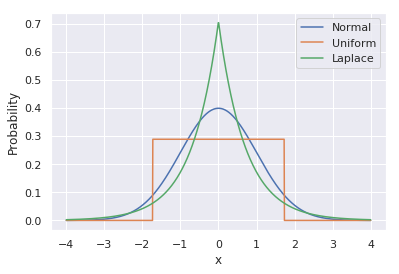

In [35]:
df = pd.DataFrame(np.linspace(-4,4,1000), columns=['x'])
df['Normal'] = norm.pdf(df['x'])
df['Uniform'] = uniform.pdf(df['x'], -np.sqrt(3), 2*np.sqrt(3))
df['Laplace'] = laplace.pdf(df['x'], 0, np.sqrt(2)/2)

sns.set()
sns.lineplot('x', 'Normal', data=df, label='Normal')
sns.lineplot('x', 'Uniform', data=df, label='Uniform')
sns.lineplot('x', 'Laplace', data=df, label='Laplace')
plt.ylabel('Probability')
plt.show()

### Likelihood

$$p(\mathbf v; \mathbf A) = p_{\mathbf h}(\mathbf A^{-1} \mathbf v) |\mathrm{det} \mathbf A^{-1}| = p_{\mathbf h}(\mathbf B \mathbf v) |\mathrm{det} \mathbf B| = |\mathrm{det} \mathbf B| \prod_{i=1}^D p_h(\mathbf b_j^\top \mathbf v) = p(\mathbf v; \mathbf B)$$

- MLE of $\mathbf B$ and $\mathbf A$ can be uniquely estimated, up to scaling and ordering
- Non-Gaussianity solves the 'factor rotation' problem in FA
- To estimate $p_h$ is difficult

## Sampling

### Monte Carlo integration

$$\mathbb E[x] \approx \frac{1}{n} \sum_{i=1}^n x_i \quad \mathbb E[g(x)] \approx \frac{1}{n} \sum_{i=1}^n g(x_i)$$

### Importance sampling

$$\int g(\mathbf x) \mathrm d \mathbf x = \int g(\mathbf x) \frac{q(\mathbf x)}{q(\mathbf x)} \mathrm d \mathbf x = \mathbb E_{q(\mathbf x)} \left[ \frac{g(\mathbf x)}{q(\mathbf x)} \right] \approx \frac{1}{n} \sum_{i=1}^n \frac{g(\mathbf x_i)}{q(\mathbf x_i)}$$

- Choose $q(\mathbf x)$ such that $\displaystyle \frac{|g(\mathbf x)|}{q(\mathbf x)}$ approximately constant

### Inverse transform sampling

#### Discrete

$$p(x) = \begin{cases}
p_1 & x=x_1 \\
p_2 & x=x_2 \\
\vdots & \vdots \\
p_n & x=x_n
\end{cases}, \quad p_0=0, \sum_{i=1}^n p_i = 1$$

1. Simulate $u \sim \mathcal U[0,1]$
1. Set $x=x_k$ if $p_{k-1} \leq u < p_k$

#### Continuous

1. Calculate inverse of cdf $F_x^{-1}$
1. Simulate $u \sim \mathcal U[0,1]$
1. Set $x = F_x^{-1}(u)$

### Rejection sampling

1. Simulate $x \sim q(x)$
1. Generate $y|x \sim \mathcal B(f(x))$
1. Accept $x$ if $y=1$


- Choose $f(x) \propto p(x) / q(x)$
- $\displaystyle x_i \sim \frac{q(x)f(x)}{\int q(x) f(x) \mathrm d x}$
- Limited to low-dim cases

### Ancestral sampling

Example: $p(x_1, \ldots, x_5) = p(x_1) p(x_2) p(x_3 | x_1, x_2) p(x_4 | x_3) p(x_5 | x_2)$

1. Simulate $x_1 \sim p(x_1)$ and $x_2 \sim p(x_2)$
1. Generate $x_3 \sim p(x_3 | x_1, x_2)$ and $x_5 \sim p(x_5 | x_2)$
1. Generate $x_4 \sim p(x_4 | x_3)$ 

### Gibbs sampling

1. Set initial state $\mathbf x^1 = (x_1^1, \ldots, x_d^1)$
1. Generate $x_i^k \sim p(x_i | \mathbf x_{\backslash i}^{k-1})$ for $i \in \{ 1, \ldots, d\}$


- Use $p(x_i | \mathrm{MB}(x_i))$ for simplicity

## Variational Inference and Learning

- **Concave function** (by Jensen's inequality): $\log \mathbb E [g(x)] \geq \mathbb E [ \log g(x) ]$
- **Kullback-Leiber (KL) divergence**: $\displaystyle \mathrm{KL} (p \| q) = \int p(\mathbf x) \log \frac{p(\mathbf x)}{q(\mathbf x)} \mathrm d \mathbf x = \mathbb E_{p(\mathbf x)} \left[ \log \frac{p(\mathbf x)}{q(\mathbf x)} \right]= \begin{cases}
    0 & p(\mathbf x) = q(\mathbf x) \\
    \text{positive} & \text{otherwise}
\end{cases}$
    - Asymmetric $\mathrm{KL}(p\|q) \neq \mathrm{KL}(q\|p)$
    - $\arg\min_q \mathrm{KL}(q\|p)$:
        - avoid regions where $p$ is small
        - produce good local fit, 'mode seeking'
    - $\arg\min_q \mathrm{KL}(p\|q)$:
        - nonzero where $p$ is nonzero
        - does not care about regions where $p$ is small
        - corresponds to MLE
        - produce global fit / moment matching

**Authors:** s1680642

**Licensing:** <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.